In [2]:
import numpy as np
import xarray as xr

In [5]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_hydro_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'cp': <xarray.Variable (time: 504, l

In [11]:
import xarray as xr
era5_sshf = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['sshf'].values
era5_slhf = xr.open_dataset("/project2/rossby/group11/era5_slhf_1979_2020_tzmean.nc")['slhf'].values
era5_ssr = xr.open_dataset("/project2/rossby/group11/era5_ssr_1979_2020_tzmean.nc")['ssr'].values #surface solar radiation (downward)
era5_str = xr.open_dataset("/project2/rossby/group11/era5_str_1979_2020_tzmean.nc")['str'].values #surface net thermal radiation (downward)
era5_tsr = xr.open_dataset("/project2/rossby/group11/era5_tsr_1979_2020_tzmean.nc")['tsr'].values #TOA solar radiation (shortwave, up)
era5_ttr = xr.open_dataset("/project2/rossby/group11/era5_ttr_1979_2020_tzmean.nc")['ttr'].values#TOA thermal radiation (longwave, up)

lat = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['latitude'].values

Text(0, 0.5, 'Energy Flux (W/m^-2)')

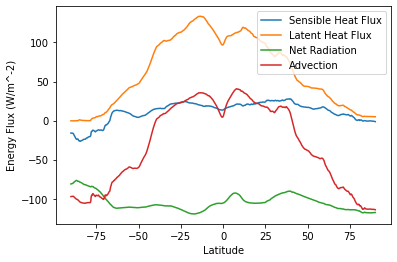

In [12]:
import matplotlib.pyplot as plt
era5_sshf_wm2 = era5_sshf/86400
era5_slhf_wm2 = era5_slhf/86400
era5_ra_wm2 = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
era5_fa_wm2 = era5_ra_wm2 - era5_sshf_wm2 - era5_slhf_wm2
plt.plot(lat, -era5_sshf_wm2, label = "Sensible Heat Flux")
plt.plot(lat, -era5_slhf_wm2, label = "Latent Heat Flux")
plt.plot(lat, era5_ra_wm2, label = "Net Radiation")
plt.plot(lat, era5_fa_wm2, label = "Advection")
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Energy Flux (W/m^-2)")
#positive: into the column
#negative: out of the column

Text(0, 0.5, 'R1 (unitless)')

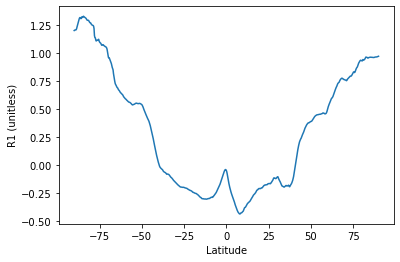

In [13]:
R1 = era5_fa_wm2/era5_ra_wm2
plt.plot(lat, R1)
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")

In [14]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    era5_ssrc = ds['ssrc'].mean(['time','longitude']).values#incoming, from out
    era5_strc = ds['strc'].mean(['time','longitude']).values#incoming, from surface
    era5_tsrc = ds['tsrc'].mean(['time','longitude']).values#outgoing, TOA, shortwave
    era5_ttrc = ds['ttrc'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal

In [15]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    era5_ssr = ds['ssr'].mean(['time','longitude']).values#incoming, from out, shortwave
    era5_str = ds['str'].mean(['time','longitude']).values#incoming, from surface, longwave
    era5_tsr = ds['tsr'].mean(['time','longitude']).values#outgoing, TOA, shortwave
    era5_ttr = ds['ttr'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal

In [16]:
clr = (era5_tsrc + era5_ttrc - era5_ssrc - era5_strc)/86400
tot_rad = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
acre = tot_rad - clr
tot_rad_sw = (era5_tsr - era5_ssr)/86400
tot_rad_lw = (era5_ttr - era5_str)/86400
clr_sw = (era5_tsrc - era5_ssrc)/86400
clr_lw = (era5_ttrc - era5_strc)/86400
acre_sw = tot_rad_sw - clr_sw
acre_lw = tot_rad_lw - clr_lw

era5_fa_wm2 = tot_rad - (era5_sshf + era5_slhf)/86400

R1_cre = acre/tot_rad
R1_cre_sw = acre_sw/tot_rad
R1_cre_lw = acre_lw/tot_rad
R2 = (-era5_sshf - era5_slhf)/86400/tot_rad
R1 = era5_fa_wm2/tot_rad
R1_clr = clr/tot_rad

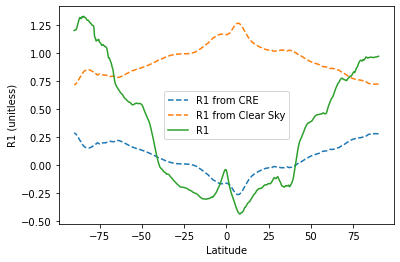

In [17]:
import matplotlib.pyplot as plt
plt.plot(lat, R1_cre, label = "R1 from CRE", linestyle = "--")
#plt.plot(lat, R1_cre_sw, label = "R1 from SW CRE", linestyle = "--")
#plt.plot(lat, R1_cre_lw, label = "R1 from lw CRE", linestyle = "--")
plt.plot(lat, R1_clr, label = "R1 from Clear Sky", linestyle = "--")
plt.plot(lat, R1, label = "R1")
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")
plt.legend()

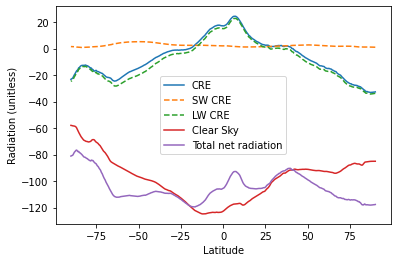

In [18]:
plt.plot(lat, acre, label = "CRE")
plt.plot(lat, acre_sw, label = "SW CRE", linestyle = "--")
plt.plot(lat, acre_lw, label = "LW CRE", linestyle = "--")
plt.plot(lat, clr, label = "Clear Sky")
plt.plot(lat, tot_rad, label = "Total net radiation")
plt.xlabel("Latitude")
plt.ylabel("Radiation (unitless)")
plt.legend()

In [5]:
filesource = '/project2/rossby/group11/cc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    cloud_fraction = ds['cc']
    print(ds.variables)

Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'level': <xarray.IndexVariable 'level' (level: 37)>
array([0.001, 0.002, 0.003, 0.005, 0.007, 0.01 , 0.02 , 0.03 , 0.05 , 0.07 ,
       0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.3  , 0.35 , 0.4  ,
       0.45 , 0.5  , 0.55 , 0.6  , 0.65 , 0.7  , 0.75 , 0.775, 0.8  , 0.825,
       0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975, 1.   ]), 'time': <xarray.IndexVariable 'time' (time: 1)>
array(['1979-01-01T00:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:  time, 'cc': <xarray.Variable (time: 1, level: 37, latitude: 721

In [4]:
print(cloud_fraction)

<xarray.DataArray 'cc' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
  * time       (time) datetime64[ns] 1979-01-01
Attributes:
    units:      (0 - 1)
    long_name:  Fraction of cloud cover


In [8]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    era5_ssr = ds['ssr'].mean(['time'])#incoming, from out, shortwave
    era5_str = ds['str'].mean(['time'])#incoming, from surface, longwave
    era5_tsr = ds['tsr'].mean(['time'])#outgoing, TOA, shortwave
    era5_ttr = ds['ttr'].mean(['time'])#outgoing, TOA, longwave/thermal

In [9]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'
with xr.open_dataset(filesource) as ds:
    lat = ds['latitude'].values
    lon = ds['longitude'].values
    era5_sshf = ds['sshf'].mean(['time'])
    era5_slhf = ds['slhf'].mean(['time'])

In [11]:
tot_rad = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
era5_fa_wm2 = tot_rad - (era5_sshf + era5_slhf)/86400
R1 = era5_fa_wm2/tot_rad

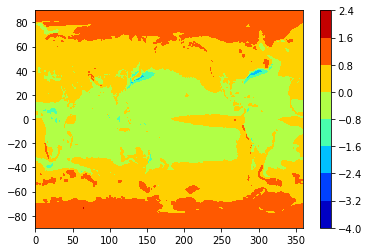

In [14]:
import matplotlib.pyplot as plt
plt.contourf(lon,lat,R1,cmap='jet')
plt.colorbar()

In [ ]:
bins = np.arange(-0.6,1.4,0.2)
cloud_fraction_binned = cloud_fraction.groupby_bins(R1,bins).mean()

In [ ]:
ax = cloud_fraction_binned.plot()
plt.title("Cloud Fraction")
plt.xlabel("R1")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()

In [ ]:
filesource = '/project2/rossby/group11/ciwc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    print(ds.variables)
    ciwc = ds['ciwc']

In [ ]:
bins = np.arange(-0.6,1.4,0.2)
ciwc_binned = ciwc.groupby_bins(R1,bins).mean()

In [ ]:
ax = ciwc_binned.plot()
plt.title("Cloud Ice Water Content")
plt.xlabel("R1")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()

In [25]:
filesource = '/project2/rossby/group11/clwc_1979_2021_mean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    clwc = ds['clwc']
    print(clwc)

<xarray.DataArray 'clwc' (time: 1, level: 37, latitude: 721, longitude: 1440)>
[38414880 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
  * time       (time) datetime64[ns] 1979-01-01
Attributes:
    units:      kg kg**-1
    long_name:  Specific cloud liquid water content


In [ ]:
bins = np.arange(-0.6,1.4,0.2)
clwc_binned = clwc.groupby_bins(R1,bins).mean()

ax = clwc_binned.plot()
plt.title("Cloud Liquid Water Content")
plt.xlabel("R1")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()

In [30]:
## read in temperature data
filesource = '/project2/rossby/group11/era5_t_1979_2021_monthly_tmean.nc'
with xr.open_dataset(filesource) as ds:
    ds['level'] = ds.level/1000
    ds = ds.rename_dims(dims_dict={
  "lon": "longitude",
  "lat": "latitude",
})
    temp = ds['t']
    print(temp)

<xarray.DataArray 't' (level: 37, latitude: 180, longitude: 360)>
[2397600 values with dtype=float64]
Coordinates:
    lon      (longitude) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    lat      (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * level    (level) float64 0.001 0.002 0.003 0.005 ... 0.925 0.95 0.975 1.0
Dimensions without coordinates: latitude, longitude
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    cell_methods:   time: mean


In [32]:
print(R1)

<xarray.DataArray 'group' (latitude: 721, longitude: 1440)>
array([[0.96960212, 0.96960212, 0.96960212, ..., 0.96960212, 0.96960212,
        0.96960212],
       [0.96306521, 0.96305219, 0.96303425, ..., 0.96305738, 0.96305682,
        0.96306508],
       [0.95633035, 0.95631502, 0.95629398, ..., 0.95632889, 0.95632917,
        0.9563316 ],
       ...,
       [1.23073725, 1.23085846, 1.23099836, ..., 1.2303846 , 1.23049448,
        1.23061692],
       [1.22039295, 1.22047147, 1.2205467 , ..., 1.2202266 , 1.22027815,
        1.22033658],
       [1.19907234, 1.19907234, 1.19907234, ..., 1.19907234, 1.19907234,
        1.19907234]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0


In [39]:
R1_coarse = R1.coarsen(longitude=4, latitude=4, boundary='trim').mean()
bins = np.arange(-0.6,1.4,0.2)
#temp_binned = temp.groupby_bins(R1,bins).mean()

ValueError: the group variable's length does not match the length of this variable along its dimension

In [40]:
print(R1_coarse)

<xarray.DataArray 'group' (latitude: 180, longitude: 360)>
array([[0.96092448, 0.96086158, 0.96079934, ..., 0.96093991, 0.96094015,
        0.96094324],
       [0.95160119, 0.95159595, 0.95159165, ..., 0.95142861, 0.95149291,
        0.95156126],
       [0.94620569, 0.9460056 , 0.94579593, ..., 0.94620266, 0.94621932,
        0.94624838],
       ...,
       [1.29305578, 1.29345153, 1.29380776, ..., 1.28859523, 1.29027151,
        1.29199002],
       [1.26170905, 1.26156297, 1.26137564, ..., 1.25982203, 1.2605391 ,
        1.26129331],
       [1.23352226, 1.23404634, 1.23457051, ..., 1.23188746, 1.23244072,
        1.23298949]])
Coordinates:
  * longitude  (longitude) float32 0.375 1.375 2.375 3.375 ... 357.4 358.4 359.4
  * latitude   (latitude) float32 89.62 88.62 87.62 ... -87.38 -88.38 -89.38


In [ ]:
ax = clwc_binned.plot()
plt.title("Temperature")
plt.xlabel("R1")
plt.ylabel("Sigma")
plt.gca().invert_yaxis()